# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym (**New package to install**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [ ]:
pip install ipywidgets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from collections import defaultdict
import random
import gym

In [ ]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.legend(handles=h_list)
    plt.show()

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [ ]:
pip install --upgrade gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 721 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827651 sha256=38f82d68b0cfe9238a95aac63a811f05d5a280abbb8075e1706195d62a095b68
  Stored in directory: /root/.cache/pip/wheels/4d/c8/dc/d08577bffa680f083f04448e81e4f176d0e45a13eb16f93c0c
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
# test code for using the "Backjack" implementation from OpenAI
import gym
env = gym.make("Blackjack-v1")
env.reset()
# iteracting with the environment for 10 time steps using a random policy

for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    
    # interact with the envrionment
    next_s, reward, done, info, _ = env.step(action)
    
    # print info
    print(f"t = {t}, next_state = {next_s}, reward = {reward}, done = {done}")
    
    # check termination
    if done:
        env.reset()

t = 0, next_state = (12, 10, False), reward = -1.0, done = True
t = 1, next_state = (19, 10, False), reward = -1.0, done = True
t = 2, next_state = (10, 8, False), reward = -1.0, done = True
t = 3, next_state = (25, 7, False), reward = -1.0, done = True
t = 4, next_state = (20, 3, False), reward = -1.0, done = True
t = 5, next_state = (20, 6, False), reward = 1.0, done = True
t = 6, next_state = (4, 10, False), reward = -1.0, done = True
t = 7, next_state = (27, 6, False), reward = -1.0, done = True
t = 8, next_state = (11, 4, False), reward = 1.0, done = True
t = 9, next_state = (18, 2, False), reward = -1.0, done = True


## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode on page 92). 

Please read the Example 5.1 on page 93 and reproduce the Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(a) """
env = gym.make("Blackjack-v1")
v = {}
returns = {}
gamma = 0.99
n_iterations = 50000
for iteration in tqdm(range(n_iterations)):
# for iteration in range(500000):
    
    episode = []
    
    # Resetting state 
    state, info = env.reset()
    reward = 0
    done = False
    state_list = []
    while not done:
        # sample an random action
        if state[0] == 20 or state[0] == 21:
            action = 0
        else:
            action = 1
    
        next_s, reward, done, info, _ = env.step(action)
        
        episode.append([state, action, reward])
        state_list.append(state)
        
        state = next_s
    G = 0 
    for step in range(len(episode) - 1, -1, -1):
        G = gamma*G + episode[step][2]
        c_state = episode[step][0]
        if c_state not in state_list[:step]:
            if c_state not in returns:
                returns[c_state] = []
                v[c_state] = []
            returns[c_state].append(G)
            v[c_state] = sum(returns[c_state])/len(returns[c_state])

100%|███████████████████████████████████| 50000/50000 [00:07<00:00, 6861.69it/s]


In [ ]:
def black_jack_graphs(data, value, Title):
    x1 = np.linspace(1, 10, num=10)
    y1 = np.linspace(12, 20, num=value)
    x1, y1 = np.meshgrid(x1, y1)
    z1 = data

    fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
    surf1 = ax1.plot_surface(x1, y1, z1)
    ax1.set_zlim(-1.0, 1.0)
    plt.xlabel('dealer showing')
    plt.ylabel('player sum')
    plt.title(Title)
    plt.show()

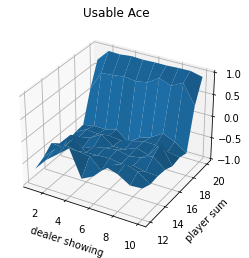

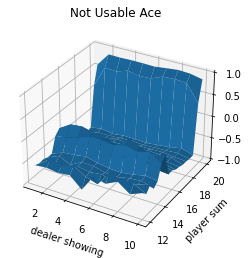

In [ ]:
# Running 2 a
usable_Ace = np.zeros([21, 10])
non_usable_Ace = np.zeros([21, 10])

for i in v.keys():
  if i[2]:
    usable_Ace[i[0] - 1, i[1] - 1] = v[i]
  else:
    non_usable_Ace[i[0] - 1, i[1] - 1] = v[i]
    
black_jack_graphs(usable_Ace[12:], 9, "Usable Ace")
black_jack_graphs(non_usable_Ace[4:], 17, "Not Usable Ace")


## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES on page 99). 

Please read the Example 5.1 and reproduce the Figure 5.2

In [ ]:
## Implementation for the 2b
env = gym.make("Blackjack-v1")
env.reset()

n_iterations = 500000
gamma = 0.99


Q = defaultdict(lambda: np.zeros(env.action_space.n))
N = defaultdict(lambda: np.zeros(env.action_space.n))
policy ={}
for it in tqdm(range(n_iterations)):
    
    episode = []
    state, _ = env.reset()
    state_list = []
    done = False
    while not done:
        
        if state in policy.keys():
            action = policy[state]
        else:
            action = np.random.choice([0,1])
        
        next_s, reward, done, info, _ = env.step(action)
        episode.append((state, action, reward))
        state_list.append((state, action))
        state = next_s
    G = 0
    for step in range(len(episode) - 1, -1, -1): 
        r = episode[step][2]
        a = episode[step][1]
        s = episode[step][0]
        G = gamma * G + r
        if (s,a) not in state_list[:step]:
            N[s][a] += 1
            Q[s][a] += (G-Q[s][a])/N[s][a]
            policy[s] = np.argmax(Q[s])

100%|█████████████████████████████████| 500000/500000 [01:12<00:00, 6883.56it/s]


In [ ]:
def policy_graph(data, Title):
    plt.imshow(np.flip(data), extent=[1, 10, 11, 21])
    plt.xlabel('dealer showing')
    plt.ylabel('player sum')
    plt.title(Title)
    plt.show()

In [ ]:
##Running 2b
u_A = np.zeros([21, 10])
n_A = np.zeros([21, 10])
u_P = np.zeros([21, 10])
n_P = np.zeros([21, 10])

for k in Q.keys():
    if k[2]:
        u_A[k[0] - 1, k[1] - 1] = np.max(Q[k])
        u_P[k[0] - 1, k[1] - 1] = policy[k]

    else:
        n_A[k[0] - 1, k[1] - 1] = np.max(Q[k])
        n_P[k[0] - 1, k[1] - 1] = policy[k]
        
        
# policy_graph(u_P[11:], "Usable Ace")
# policy_graph(n_P[10:], "Not Usable Ace")

black_jack_graphs(u_A[12:], 9, "Usable Ace")
black_jack_graphs(n_A[4:], 17, "Not Usable Ace")

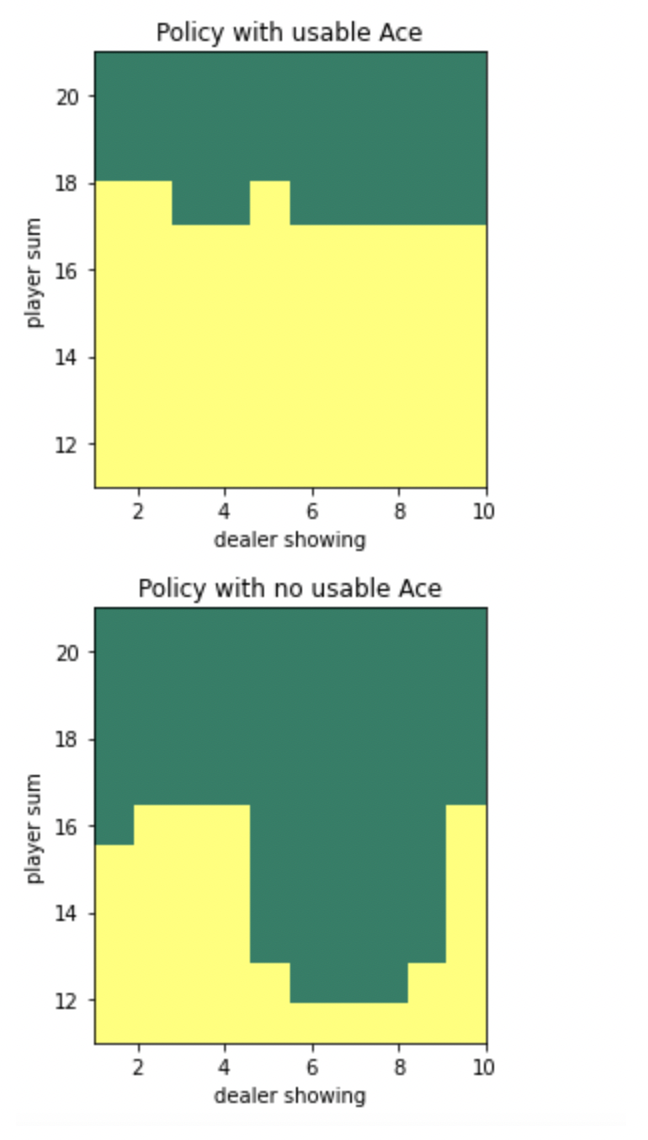

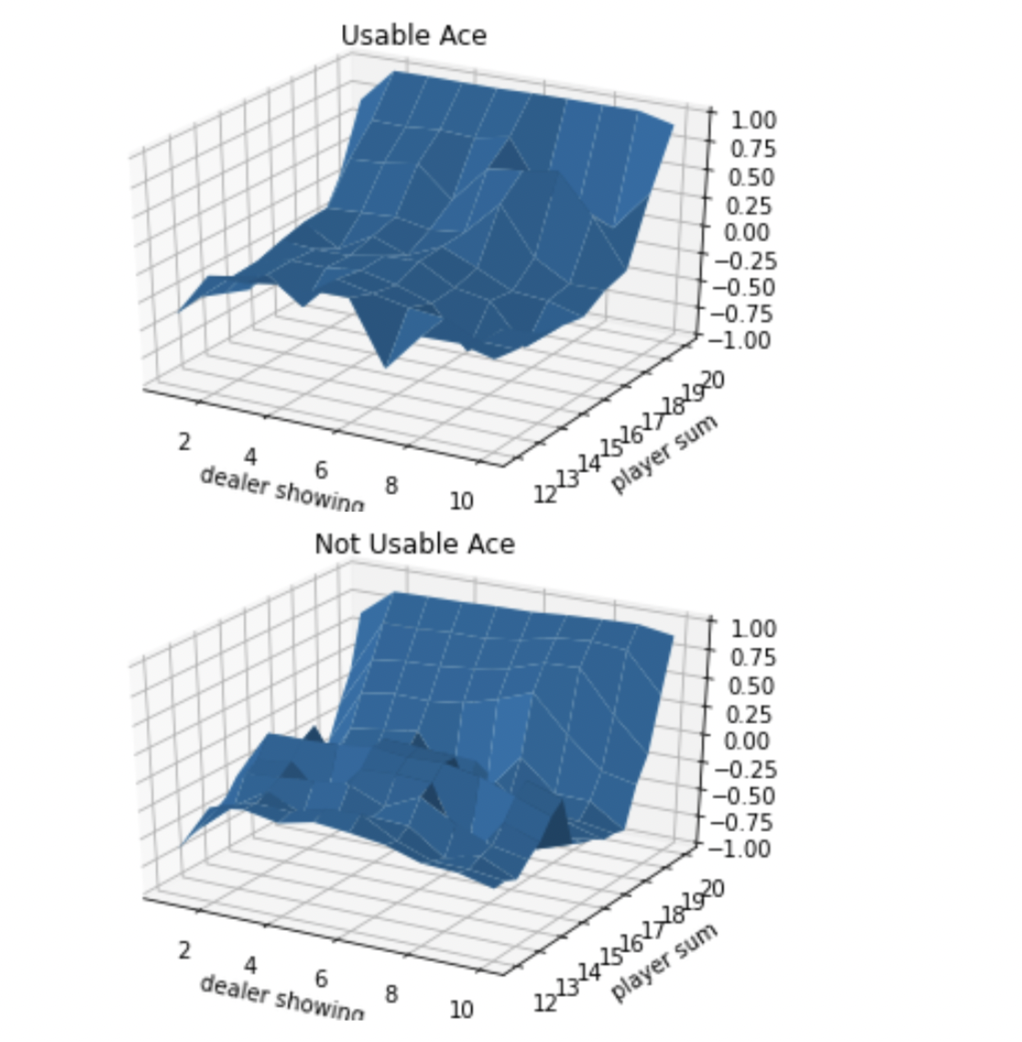

# Q3: Four Rooms, re-visited

In [ ]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func_for_4(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Episode's discounted reward")
    plt.xlabel("Episode step")
    plt.show()

In [ ]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Q3-(a) """
# Implementation of the one-policy first-vist Monte-Carlo control (for ε-soft policies) here.
# To debug your code, you can use run_num = 5 and episode_num = 1e3
# To report the finial results, please use run_num = 10 and episode_num = 1e4

' CODE HERE YOUR IMPLEMENTATION for Q3-(a) '

In [ ]:
def q3(epsilon):

    gamma = 0.99
    # fix the randomness for reproduction
    # np.random.seed(1234)

    # create the environment
    fEnv = FourRooms()
    

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 5 
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)

    # save the rewards for plot
    rewards_list = np.empty((trial_num, trial_length))
    
    action_s = {0:"UP", 1:"DOWN", 2:"LEFT", 3:"RIGHT"}
    n_length = len(list(action_s.keys()))

    # run experiment
    for e in range(trial_num):   

        Q_f = defaultdict(lambda: np.zeros(4))
        N_f = defaultdict(lambda: np.zeros(4))
        # run each trial
        for t in tqdm(range(trial_length)):

            episode = []
            state_action_list = []
            state, reward, done = fEnv.reset()
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            while not done:
                action = np.random.choice(list(action_s.keys()))
                t_s = tuple(state)
                if t_s in Q_f.keys():
                    action_star = np.argmax(Q_f[t_s])
                    length = len(Q_f[t_s])
                    action = random.choices([action_star, action], weights = [1 - epsilon + epsilon/length, epsilon/length], k = 1)[0]
                
                # CODE HERE: please implement the code to get the next state and reward
                # it should takes in the current state and action
                # it should returns the next_state and reward
                act = action_s[action]
                next_state, reward, done = fEnv.step(state, act)
                episode.append((t_s, action, reward))
                state_action_list.append((t_s, action))

                state = next_state
            G = 0
            for step in range(len(episode)-1, -1, -1):
                r = episode[step][2]
                a = episode[step][1]
                s = episode[step][0]
                G = gamma*G + r
                if (s, a) not in state_action_list[:step]:
                    N_f[s][a] += 1
                    Q_f[s][a] += (G - Q_f[s][a])/N_f[s][a]

            rewards_list[e, t] = G

    return rewards_list


In [ ]:
rewards_list = q3(0.1)

100%|████████████████████████████████████| 10000/10000 [00:34<00:00, 287.38it/s]


In [ ]:
rewards_list2 = q3(0.01)

100%|████████████████████████████████████| 10000/10000 [01:08<00:00, 146.35it/s]


In [ ]:
rewards_list3 = q3(0)

100%|█████████████████████████████████████| 10000/10000 [02:25<00:00, 68.90it/s]


<Figure size 432x288 with 0 Axes>

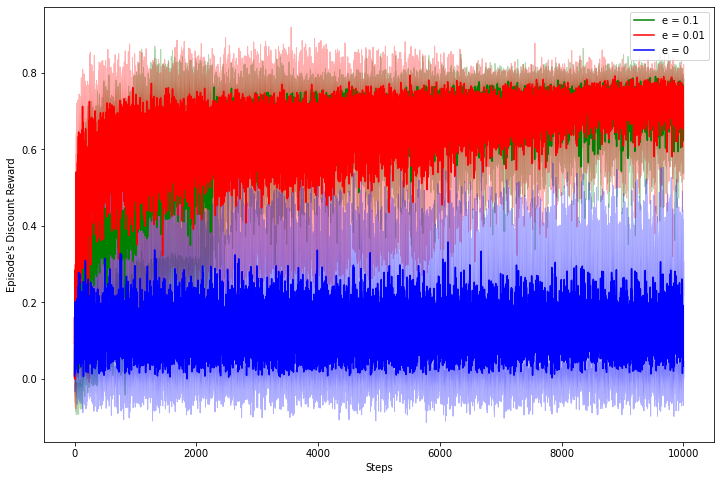

In [ ]:
plot_curves([rewards_list, rewards_list2, rewards_list3], ["e = 0.1","e = 0.01","e = 0"], ["g", "r", "b"], "Episode's Discount Reward")

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [ ]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

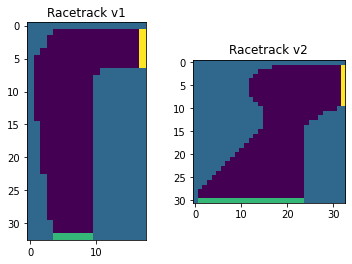

In [ ]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [ ]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 1e4

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(a) """
# Implement here and use the plotting function above to plot the learning curve 
def q5(epsilon):
  gamma = 0.9
    # fix the randomness for reproduction
  # np.random.seed(1234)
  
  # create the environment
  fEnv = Racetrack("v1")

  # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
  trial_num = 10
  # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
  trial_length = 2000
  
  # save the rewards for plot
  rewards_list = np.empty((trial_num, trial_length))
  # action_s = {0:"UP", 1:"DOWN", 2:"LEFT", 3:"RIGHT"}
  action_s = {0:[-1, -1],1: [-1, 0],2: [-1, 1],
                             3:[0, -1], 4:[0, 0], 5:[0, 1],
                             6:[1, -1], 7:[1, 0], 8:[1, 1]}

  # Q_f = defaultdict(lambda: np.zeros(4))
  # N_f = defaultdict(lambda: np.zeros(4))
  # run experiment
  for e in tqdm(range(trial_num)):   

    Q_f = defaultdict(lambda: np.zeros(len(action_s)))
    N_f = defaultdict(lambda: np.zeros(len(action_s)))
    action_star = defaultdict(lambda: np.zeros(1))
    # run each trial
    for t in tqdm(range(trial_length)):

      episode = []
      state_action_list = []
      state, reward, done = fEnv.reset()
        # CODE HERE: please implement a random policy to obtain an action.
        # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
      while not done:
        action = np.random.choice(list(action_s.keys()))
        t_s = tuple(state)
        if t_s in Q_f.keys():
          # action_star = np.argmax(Q_f[t_s])
          # length = len(Q_f[t_s])
          action = random.choices([action_star[t_s], action], weights = [1 - epsilon , epsilon], k = 1)[0]
                    
        # CODE HERE: please implement the code to get the next state and reward
        # it should takes in the current state and action
        # it should returns the next_state and reward
        act = action_s[action]
        next_state, reward, done = fEnv.step(state, act)
        # print(state, action, act, next_state)
        episode.append((t_s, action, reward))
        state_action_list.append((t_s, action))
        
        state = next_state
      G = 0
      for step in range(len(episode)-1, -1, -1):
        r = episode[step][2]
        a = episode[step][1]
        s = episode[step][0]
        G = gamma*G + r
        if (s, a) not in state_action_list[:step]:
          N_f[s][a] += 1
          Q_f[s][a] += (G - Q_f[s][a])/N_f[s][a]
          action_star[s] = np.argmax(Q_f[s])
      rewards_list[e, t] = G

  return rewards_list

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(a) """
# Implement here and use the plotting function above to plot the learning curve 
def q5(epsilon):
    gamma = 0.99
    # fix the randomness for reproduction
    # np.random.seed(1234)

    # create the environment
    fEnv = Racetrack("v12")

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 5 
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)

    # save the rewards for plot
    rewards_list = np.empty((trial_num, trial_length))
    # action_s = {0:"UP", 1:"DOWN", 2:"LEFT", 3:"RIGHT"}
    action_s = {0:[-1, -1],1: [-1, 0],2: [-1, 1],
                             3:[0, -1], 4:[0, 0], 5:[0, 1],
                             6:[1, -1], 7:[1, 0], 8:[1, 1]}

    # Q_f = defaultdict(lambda: np.zeros(4))
    # N_f = defaultdict(lambda: np.zeros(4))
  # run experiment
    for e in range(trial_num):   
        Q_f = defaultdict(lambda: np.zeros(len(action_s)))
        N_f = defaultdict(lambda: np.zeros(len(action_s)))
    # run each trial
        for t in tqdm(range(trial_length)):

            episode = []
            state_action_list = []
            state, reward, done = fEnv.reset()
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            while not done:
                action = np.random.choice(list(action_s.keys()))
                t_s = tuple(state)
                if t_s in Q_f.keys():
                    action_star = np.argmax(Q_f[t_s])
                    length = len(Q_f[t_s])
                    action = random.choices([action_star, action], weights = [1 - epsilon , epsilon], k = 1)[0]

                # CODE HERE: please implement the code to get the next state and reward
                # it should takes in the current state and action
                # it should returns the next_state and reward
                act = action_s[action]
                next_state, reward, done = fEnv.step(state, act)
                # print(state, action, act, next_state)
                episode.append((t_s, action, reward))
                state_action_list.append((t_s, action))
                state = next_state
            G = 0
            for step in range(len(episode)-1, -1, -1):
                r = episode[step][2]
                a = episode[step][1]
                s = episode[step][0]
                G = gamma*G + r
                if (s, a) not in state_action_list[:step]:
                    N_f[s][a] += 1
                    Q_f[s][a] += (G - Q_f[s][a])/N_f[s][a]
            rewards_list[e, t] = G

    return rewards_list

In [ ]:
rewards_list_R = q5(0.1)

100%|████████████████████████████████████| 10000/10000 [00:56<00:00, 177.54it/s]


<Figure size 432x288 with 0 Axes>

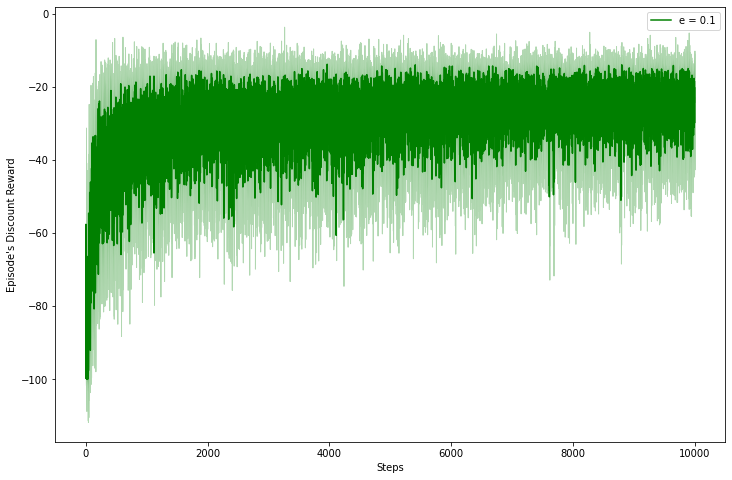

In [ ]:
plot_curves([rewards_list_R], ["e = 0.1"], ["g"], "Episode's Discount Reward")

In [ ]:
rewards_list_R_v2 = q5(0.1)

100%|████████████████████████████████████| 10000/10000 [00:40<00:00, 248.01it/s]


<Figure size 432x288 with 0 Axes>

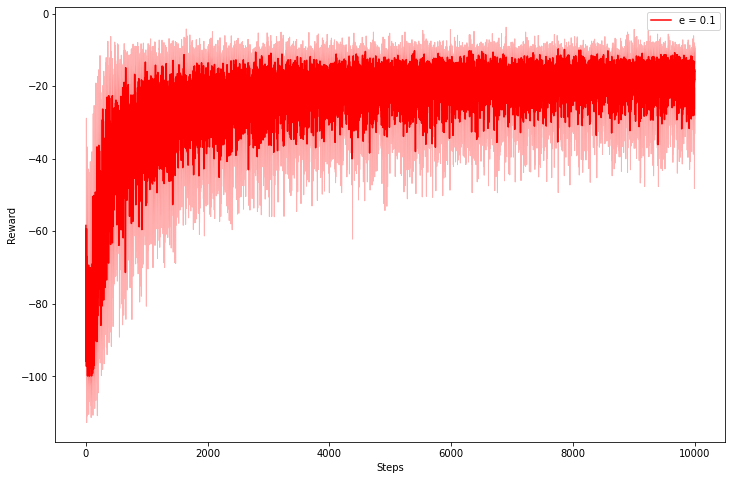

In [ ]:
plot_curves([rewards_list_R_v2], ["e = 0.1"], ["r"], "Reward")

<Figure size 432x288 with 0 Axes>

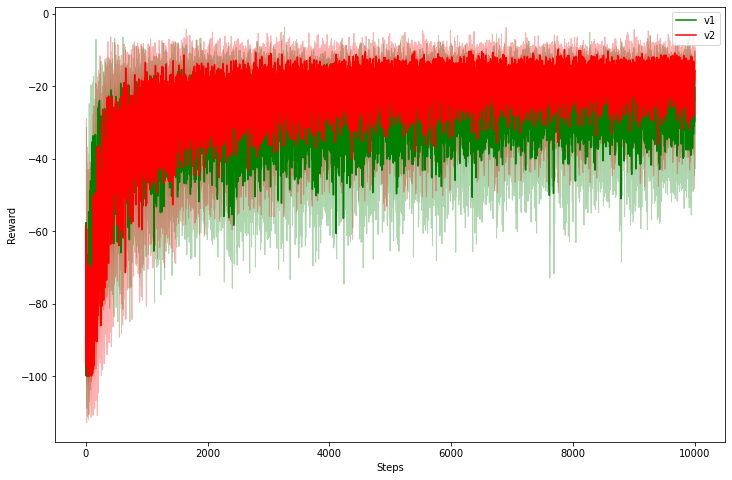

In [ ]:
plot_curves([rewards_list_R  , rewards_list_R_v2], ["v1", "v2"], ["g", "r"], "Reward")

## (b): Implement off-policy Monte-Carlo control. Please specify what behavior policy you are using.
    - Plot the learning curves for the two tracks
    - Using running trials number = 10 and episodes number = 1e4

In [ ]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(b) """
# Implement here and use the plotting function above to plot the learning curve 

def q5b(epsilon):
    gamma = 0.9
    # fix the randomness for reproduction
    # np.random.seed(1234)

    # create the environment
    fEnv = Racetrack("v2")

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 5 
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e3)

    # save the rewards for plot
    rewards_list = np.empty((trial_num, trial_length))
    # action_s = {0:"UP", 1:"DOWN", 2:"LEFT", 3:"RIGHT"}
    action_s = {0:[-1, -1],1: [-1, 0],2: [-1, 1],
                             3:[0, -1], 4:[0, 0], 5:[0, 1],
                             6:[1, -1], 7:[1, 0], 8:[1, 1]}

    # Q_f = defaultdict(lambda: np.zeros(4))
    # N_f = defaultdict(lambda: np.zeros(4))
    # run experiment
    for e in (range(trial_num)):   

        Q_f = defaultdict(lambda: np.zeros(len(action_s)))
        N_f = defaultdict(lambda: np.zeros(len(action_s)))
        C_f = defaultdict(lambda: np.zeros(len(action_s)))
        policy_pi = defaultdict(lambda: np.zeros(1))
        policy_b = defaultdict(lambda: np.zeros(len(action_s)))
        # run each trial
        for t in tqdm(range(trial_length)):

            episode = []
            state_action_list = []
            state, reward, done = fEnv.reset()
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            while not done:
                action = np.random.choice(list(action_s.keys()))
                t_s = tuple(state)
                if t_s in Q_f.keys():
                    action_star = np.argmax(Q_f[t_s])
                    length = len(Q_f[t_s])
                    action = random.choices([action_star, action], weights = [1 - epsilon , epsilon], k = 1)[0]
                    policy_pi[t_s] = action_star
                    policy_b[t_s][action_star] = 1-epsilon + epsilon/length
                    for acti in list(action_s.keys()):
                        if acti != action_star:
                            policy_b[t_s][acti] = epsilon/length
          
                    
                # CODE HERE: please implement the code to get the next state and reward
                # it should takes in the current state and action
                # it should returns the next_state and reward
                act = action_s[action]
                next_state, reward, done = fEnv.step(state, act)
                # print(state, action, act, next_state)
                episode.append((t_s, action, reward))
                state_action_list.append((t_s, action))
                state = next_state

            G = 0
            W = 1
            for step in range(len(episode)-1, -1, -1):
                r = episode[step][2]
                a = episode[step][1]
                s = episode[step][0]
                G = gamma*G + r
                C_f[s][a] += W
                # print(C_f[s][a])
                Q_f[s][a] +=( (G - Q_f[s][a]) * W )/C_f[s][a]

                if(policy_b[s][a] != 0):
                    W = W/policy_b[s][a]
                if (np.argmax(Q_f[s]) != policy_pi[s]):
                    break
            rewards_list[e, t] = G

    return rewards_list

In [ ]:
rewards_list_R_b = q5b(0.1)

100%|███████████████████████████████████████| 1000/1000 [18:56<00:00,  1.14s/it]


In [ ]:
rewards_list_R_b_v2 = q5b(0.1)

100%|███████████████████████████████████████| 1000/1000 [02:22<00:00,  7.02it/s]


<Figure size 432x288 with 0 Axes>

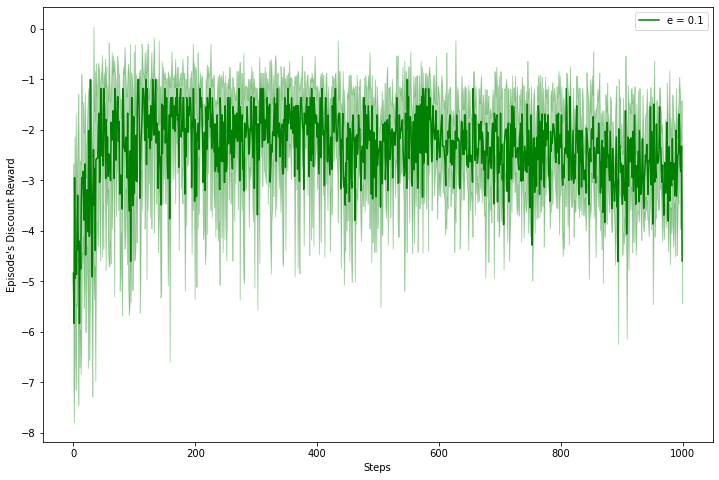

In [ ]:
plot_curves([rewards_list_R_b], ["e = 0.1"], ["g"], "Episode's Discount Reward")

<Figure size 432x288 with 0 Axes>

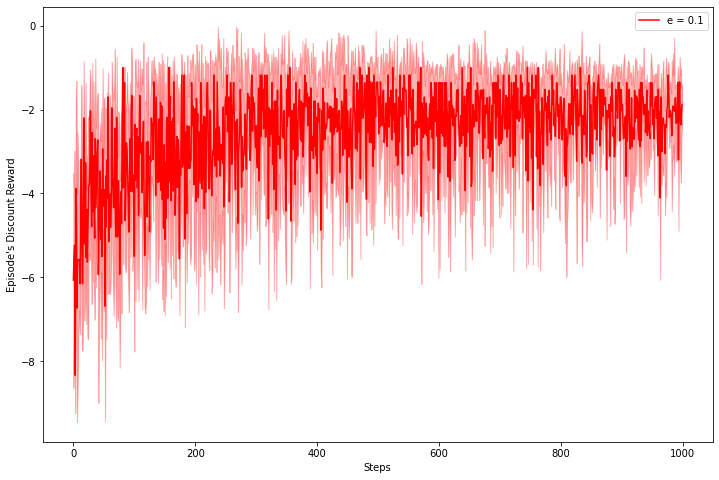

In [ ]:
plot_curves([rewards_list_R_b_v2], ["e = 0.1"], ["r"], "Episode's Discount Reward")